In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pkl
from stat_func import ecdf

In [5]:
# with open('nohitter_times.pkl', 'wb') as f:
#     pkl.dump(nohitter_times,f)

In [6]:
with open('nohitter_times.pkl', 'rb') as f:
    nohitter_times = pkl.load(f)

If assume that no-hitters are described as a Poisson process, then the time between no-hitters is Exponentially distributed

In [8]:
tau = np.mean(nohitter_times)

In [9]:
inter_nohitter_time = np.random.exponential(tau, 100000)

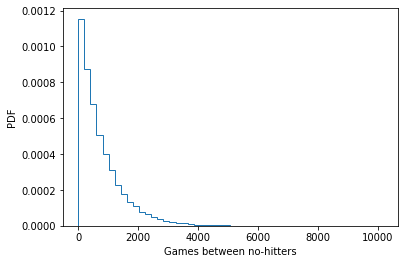

In [12]:
plt.hist(inter_nohitter_time,
             bins=50, density=True, histtype='step')
plt.xlabel('Games between no-hitters')
plt.ylabel('PDF')
plt.show()

Shape of the Exponential distribution, going from a maximum at 0 and decaying to the right.

### Create an ECDF of the real data

In [14]:
x, y = ecdf(nohitter_times)

### Create a CDF from theoretical samples

In [18]:
x_theor, y_theor = ecdf(inter_nohitter_time)

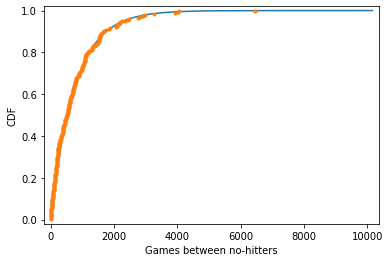

In [21]:
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')
plt.show()

It looks like no-hitters in the modern era of Major League Baseball are Exponentially distributed. Based on the story of the Exponential distribution, this suggests that they are a random process; when a no-hitter will happen is independent of when the last no-hitter was.

### Sample out of an exponential distribution with τ being twice as large as the optimal τ.

In [25]:
samples_half = np.random.exponential(tau/2, 10000)
samples_double = np.random.exponential(tau * 2, 10000)

x_half, y_half = ecdf(samples_half)
x_double, y_double = ecdf(samples_double)

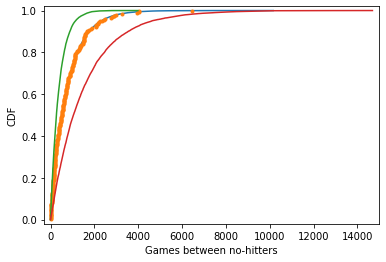

In [26]:
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')
plt.plot(x_half, y_half)
plt.plot(x_double, y_double)
plt.show()